In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/probingportscandataset/malicious_dataset.csv
/kaggle/input/probingportscandataset/normal_dataset.csv


In [2]:
df_normal = pd.read_csv("/kaggle/input/probingportscandataset/normal_dataset.csv")
df_normal.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,...,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val
0,1,"Nov 21, 2019 02:00:00.309420000 -03",1.574312e+09,2,1474,74,0x000086dd,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,131.0,0x0000308f,0.0,NaN
1,1,"Nov 21, 2019 02:00:00.313671000 -03",1.574312e+09,7,54,54,0x00000800,4.0,20.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,0x0000efab,0.0,NaN
2,1,"Nov 21, 2019 02:00:00.315642000 -03",1.574312e+09,10,70,70,0x00000800,4.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,"Nov 21, 2019 02:00:00.316152000 -03",1.574312e+09,12,551,66,0x00000800,4.0,20.0,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,252.0,0x0000ee05,0.0,NaN
4,1,"Nov 21, 2019 02:00:00.316227000 -03",1.574312e+09,14,94,94,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,4677.0,0x000048db,0.0,NaN


In [3]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103094 entries, 0 to 103093
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame_info.encap_type  103094 non-null  int64  
 1   frame_info.time        103094 non-null  object 
 2   frame_info.time_epoch  103094 non-null  float64
 3   frame_info.number      103094 non-null  int64  
 4   frame_info.len         103094 non-null  int64  
 5   frame_info.cap_len     103094 non-null  int64  
 6   eth.type               103094 non-null  object 
 7   ip.version             91762 non-null   float64
 8   ip.hdr_len             91762 non-null   float64
 9   ip.tos                 0 non-null       float64
 10  ip.id                  91762 non-null   object 
 11  ip.flags               91762 non-null   object 
 12  ip.flags.rb            91762 non-null   float64
 13  ip.flags.df            91762 non-null   float64
 14  ip.flags.mf            91762 non-nul

In [4]:
df_zarar = pd.read_csv("/kaggle/input/probingportscandataset/malicious_dataset.csv")
df_zarar.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,...,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Sep 2, 2020 21:04:37.063530000 -03",1.599091e+09,1,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x0000c9e9,0,1410.0,nmap_null
1,1,"Sep 2, 2020 21:04:39.363792000 -03",1.599091e+09,2,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x000090cb,0,1410.0,nmap_null
2,1,"Aug 27, 2020 21:12:52.279948000 -03",1.598574e+09,1,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x0000b178,0,1440.0,nmap_connect
3,1,"Aug 27, 2020 21:12:56.039540000 -03",1.598574e+09,2,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x000053fc,0,1440.0,nmap_connect
4,1,"Aug 27, 2020 21:12:56.052899000 -03",1.598574e+09,3,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x0000401e,0,1440.0,nmap_connect


In [5]:
df_zarar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193315 entries, 0 to 193314
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame_info.encap_type  193315 non-null  int64  
 1   frame_info.time        193315 non-null  object 
 2   frame_info.time_epoch  193315 non-null  float64
 3   frame_info.number      193315 non-null  int64  
 4   frame_info.len         193315 non-null  int64  
 5   frame_info.cap_len     193315 non-null  int64  
 6   eth.type               193315 non-null  object 
 7   ip.version             193315 non-null  int64  
 8   ip.hdr_len             193315 non-null  int64  
 9   ip.tos                 0 non-null       float64
 10  ip.id                  193315 non-null  object 
 11  ip.flags               193315 non-null  object 
 12  ip.flags.rb            193315 non-null  int64  
 13  ip.flags.df            193315 non-null  int64  
 14  ip.flags.mf            193315 non-nu

In [6]:
df_normal['label'] = 'normal'

In [7]:
df = pd.concat([df_normal,df_zarar],ignore_index=True)
df.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,...,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Nov 21, 2019 02:00:00.309420000 -03",1.574312e+09,2,1474,74,0x000086dd,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,131.0,0x0000308f,0.0,NaN,normal
1,1,"Nov 21, 2019 02:00:00.313671000 -03",1.574312e+09,7,54,54,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1024.0,0x0000efab,0.0,NaN,normal
2,1,"Nov 21, 2019 02:00:00.315642000 -03",1.574312e+09,10,70,70,0x00000800,4.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
3,1,"Nov 21, 2019 02:00:00.316152000 -03",1.574312e+09,12,551,66,0x00000800,4.0,20.0,NaN,...,0.0,1.0,1.0,0.0,0.0,252.0,0x0000ee05,0.0,NaN,normal
4,1,"Nov 21, 2019 02:00:00.316227000 -03",1.574312e+09,14,94,94,0x00000800,4.0,20.0,NaN,...,0.0,0.0,1.0,0.0,0.0,4677.0,0x000048db,0.0,NaN,normal


In [8]:
df.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,...,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Nov 21, 2019 02:00:00.309420000 -03",1.574312e+09,2,1474,74,0x000086dd,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,131.0,0x0000308f,0.0,NaN,normal
1,1,"Nov 21, 2019 02:00:00.313671000 -03",1.574312e+09,7,54,54,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1024.0,0x0000efab,0.0,NaN,normal
2,1,"Nov 21, 2019 02:00:00.315642000 -03",1.574312e+09,10,70,70,0x00000800,4.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
3,1,"Nov 21, 2019 02:00:00.316152000 -03",1.574312e+09,12,551,66,0x00000800,4.0,20.0,NaN,...,0.0,1.0,1.0,0.0,0.0,252.0,0x0000ee05,0.0,NaN,normal
4,1,"Nov 21, 2019 02:00:00.316227000 -03",1.574312e+09,14,94,94,0x00000800,4.0,20.0,NaN,...,0.0,0.0,1.0,0.0,0.0,4677.0,0x000048db,0.0,NaN,normal


In [9]:
def check_data(df,head=5):
    print("######## SHAPE ########") #Boyut bilgisi
    print(df.shape)
    print("######## TYPES ########")#Veri tipi bilgisi
    print(df.dtypes)
    print("######## HEAD ########")#İlk 5 satırı
    print(df.head(head))
    print("######## TAIL ########")#Son 5 satırı
    print(df.tail(head))
    print("######## NA ########")#Boş değer var mı?
    print(df.isnull().sum())
    print("######## DESCRIBE ########")#istatistiksel özeti
    print(df.describe())

In [10]:
 check_data(df)

######## SHAPE ########
(296409, 42)
######## TYPES ########
frame_info.encap_type      int64
frame_info.time           object
frame_info.time_epoch    float64
frame_info.number          int64
frame_info.len             int64
frame_info.cap_len         int64
eth.type                  object
ip.version               float64
ip.hdr_len               float64
ip.tos                   float64
ip.id                     object
ip.flags                  object
ip.flags.rb              float64
ip.flags.df              float64
ip.flags.mf              float64
ip.frag_offset           float64
ip.ttl                   float64
ip.proto                 float64
ip.checksum               object
ip.src                    object
ip.dst                    object
ip.len                   float64
ip.dsfield                object
tcp.srcport              float64
tcp.dstport              float64
tcp.seq                  float64
tcp.ack                  float64
tcp.len                  float64
tcp.hdr_len    

In [11]:
df=df.drop("ip.tos",axis=1)

In [12]:
def grab_col_names(df,cat_th=10,car_th=20):
    cat_cols=[col for col in df.columns if df[col].dtypes=="O"]# Tipi object olanları aldık
    
    # Normalde sayısal ama benzersiz sayısı 10'dan az ise kategorik değişken olarak aldık
    num_but_cat=[col for col in df.columns if df[col].nunique()<cat_th and df[col].dtypes!="O"]
    
    # Normalde kategorik değişken ama benzersiz sayısı 20'den fazla ise kardinal olarak aldık
    cat_but_car=[col for col in df.columns if df[col].nunique()>car_th and df[col].dtypes=="O"]
    
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    cat_cols=cat_cols+num_but_cat
    
    #Sayısal değişkenleri aldık
    num_cols=[col for col in df.columns if df[col].dtypes!="O"]
    
    #Sayısal değişknler içinden kategorik olarak alabileceklerimizi çıkarttık.
    num_cols=[col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols,cat_but_car
    

In [13]:
cat_cols, num_cols, cat_but_car=grab_col_names(df)

Observations: 296409
Variables: 41
cat_cols: 19
num_cols: 14
cat_but_car: 8
num_but_cat: 16


In [14]:
cat_but_car

['frame_info.time',
 'ip.id',
 'ip.checksum',
 'ip.src',
 'ip.dst',
 'tcp.flags',
 'tcp.checksum',
 'label']

In [15]:
df.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.id,...,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Nov 21, 2019 02:00:00.309420000 -03",1.574312e+09,2,1474,74,0x000086dd,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,131.0,0x0000308f,0.0,NaN,normal
1,1,"Nov 21, 2019 02:00:00.313671000 -03",1.574312e+09,7,54,54,0x00000800,4.0,20.0,0x0000b6f2,...,0.0,0.0,0.0,0.0,0.0,1024.0,0x0000efab,0.0,NaN,normal
2,1,"Nov 21, 2019 02:00:00.315642000 -03",1.574312e+09,10,70,70,0x00000800,4.0,20.0,0x0000a2bb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
3,1,"Nov 21, 2019 02:00:00.316152000 -03",1.574312e+09,12,551,66,0x00000800,4.0,20.0,0x00000ed1,...,0.0,1.0,1.0,0.0,0.0,252.0,0x0000ee05,0.0,NaN,normal
4,1,"Nov 21, 2019 02:00:00.316227000 -03",1.574312e+09,14,94,94,0x00000800,4.0,20.0,0x00000000,...,0.0,0.0,1.0,0.0,0.0,4677.0,0x000048db,0.0,NaN,normal


In [16]:
check_data(df)

######## SHAPE ########
(296409, 41)
######## TYPES ########
frame_info.encap_type      int64
frame_info.time           object
frame_info.time_epoch    float64
frame_info.number          int64
frame_info.len             int64
frame_info.cap_len         int64
eth.type                  object
ip.version               float64
ip.hdr_len               float64
ip.id                     object
ip.flags                  object
ip.flags.rb              float64
ip.flags.df              float64
ip.flags.mf              float64
ip.frag_offset           float64
ip.ttl                   float64
ip.proto                 float64
ip.checksum               object
ip.src                    object
ip.dst                    object
ip.len                   float64
ip.dsfield                object
tcp.srcport              float64
tcp.dstport              float64
tcp.seq                  float64
tcp.ack                  float64
tcp.len                  float64
tcp.hdr_len              float64
tcp.flags      

In [17]:
def cat_summary(dataframe,col_name,plot=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),"Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.xticks(rotation=60)
        plt.show(block=True)
        
        print("--------------------------------------------------------------------------------------------")

            eth.type      Ratio
eth.type                       
0x00000800    285077  96.176904
0x000086dd     11332   3.823096


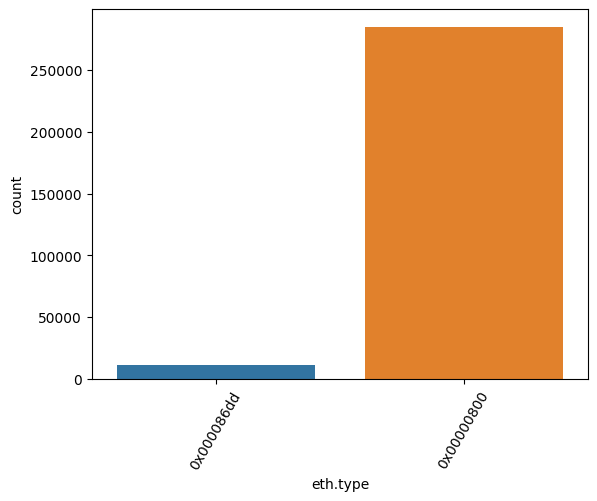

--------------------------------------------------------------------------------------------
            ip.flags      Ratio
ip.flags                       
0x00004000    197160  66.516199
0x00000000     87917  29.660705


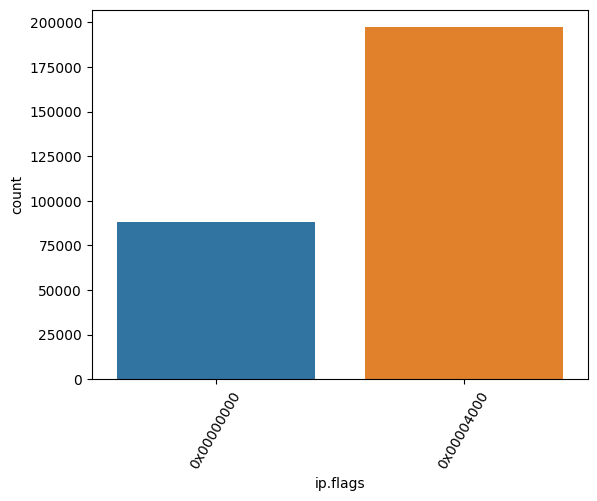

--------------------------------------------------------------------------------------------
            ip.dsfield      Ratio
ip.dsfield                       
0x00000000      247973  83.659066
0x0000000a       14396   4.856803
0x00000020        9053   3.054226
0x00000008        8102   2.733385
0x00000002        4676   1.577550
0x00000010         296   0.099862
0x000000c0         234   0.078945
0x00000018         169   0.057016
0x000000e0         103   0.034749
0x00000014          30   0.010121
0x00000003          16   0.005398
0x0000001a          12   0.004048
0x000000b8           5   0.001687
0x00000048           4   0.001349
0x00000004           3   0.001012
0x000000c2           2   0.000675
0x0000000c           1   0.000337
0x00000038           1   0.000337
0x000000d0           1   0.000337


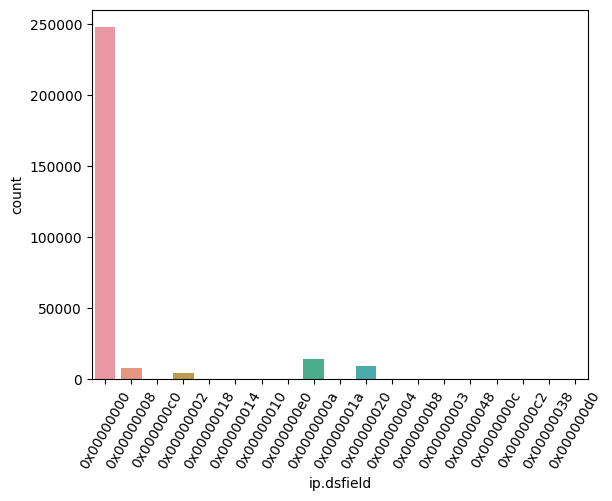

--------------------------------------------------------------------------------------------
                       frame_info.encap_type  Ratio
frame_info.encap_type                              
1                                     296409  100.0


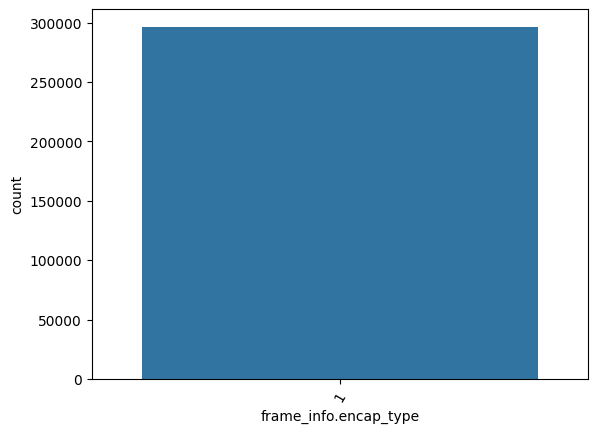

--------------------------------------------------------------------------------------------
            ip.version      Ratio
ip.version                       
4.0             285077  96.176904


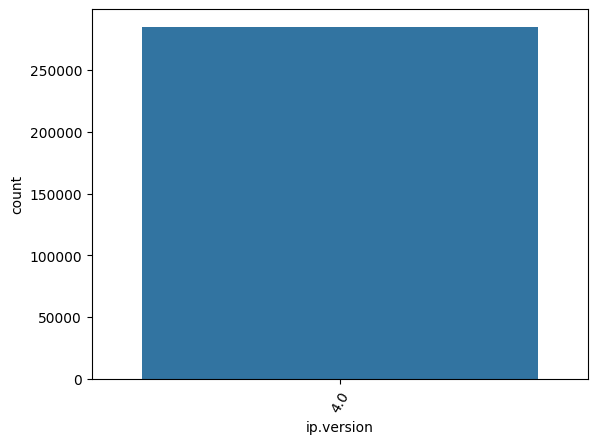

--------------------------------------------------------------------------------------------
            ip.hdr_len      Ratio
ip.hdr_len                       
20.0            285077  96.176904


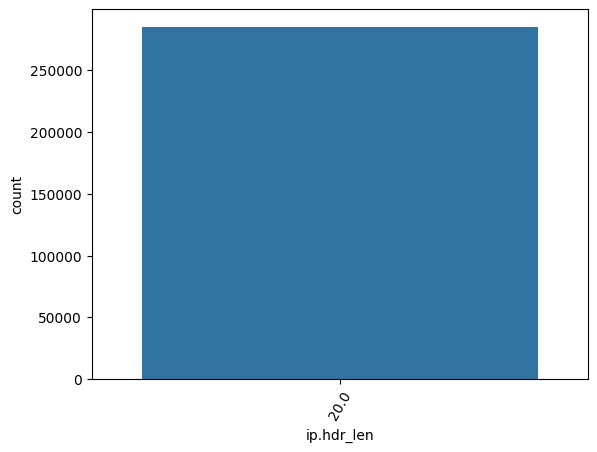

--------------------------------------------------------------------------------------------
             ip.flags.rb      Ratio
ip.flags.rb                        
0.0               285077  96.176904


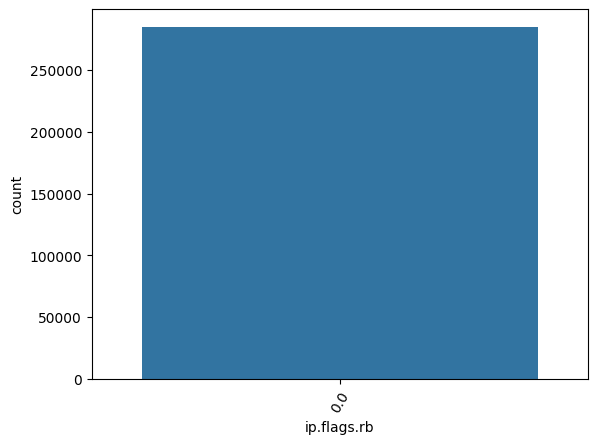

--------------------------------------------------------------------------------------------
             ip.flags.df      Ratio
ip.flags.df                        
1.0               197160  66.516199
0.0                87917  29.660705


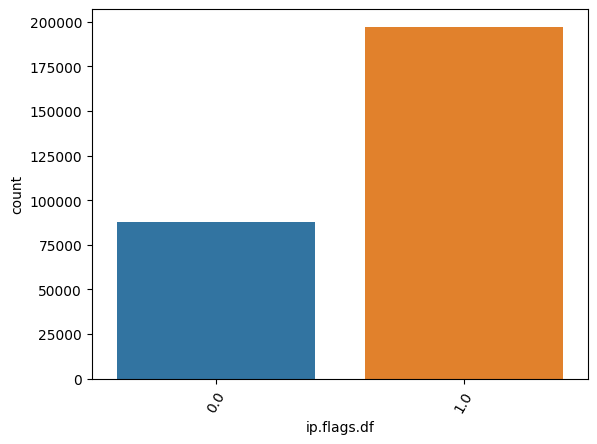

--------------------------------------------------------------------------------------------
             ip.flags.mf      Ratio
ip.flags.mf                        
0.0               285077  96.176904


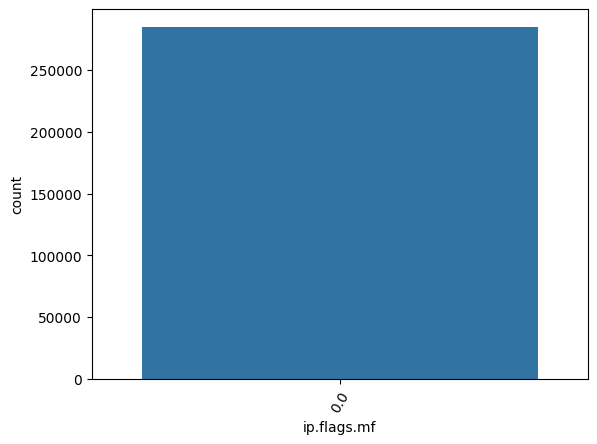

--------------------------------------------------------------------------------------------
                ip.frag_offset      Ratio
ip.frag_offset                           
0.0                     285077  96.176904


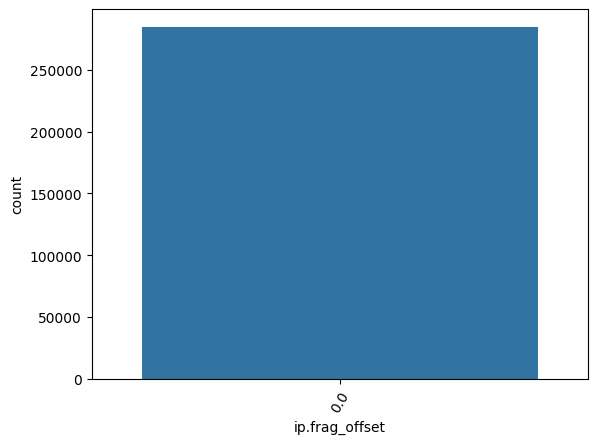

--------------------------------------------------------------------------------------------
          ip.proto      Ratio
ip.proto                     
6.0         284701  96.050052
1.0            376   0.126852


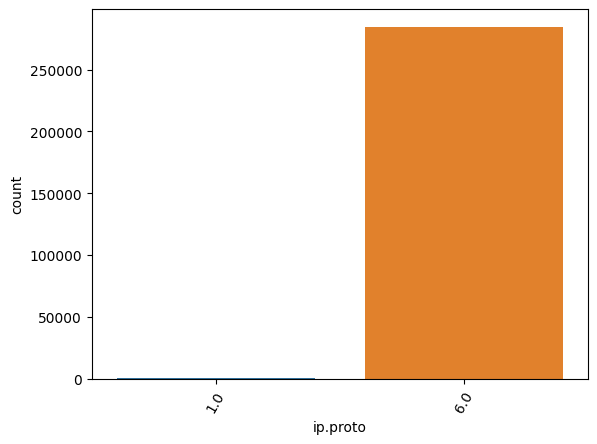

--------------------------------------------------------------------------------------------
               tcp.flags.fin      Ratio
tcp.flags.fin                          
0.0                   268627  90.627140
1.0                    27406   9.246008


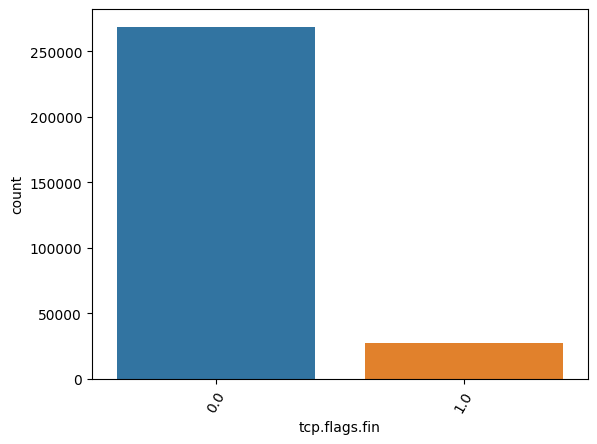

--------------------------------------------------------------------------------------------
               tcp.flags.syn      Ratio
tcp.flags.syn                          
1.0                   155324  52.401918
0.0                   140709  47.471231


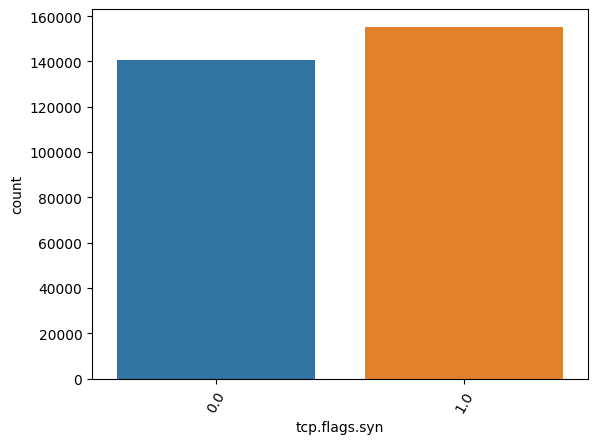

--------------------------------------------------------------------------------------------
                 tcp.flags.reset      Ratio
tcp.flags.reset                            
0.0                       283602  95.679281
1.0                        12431   4.193867


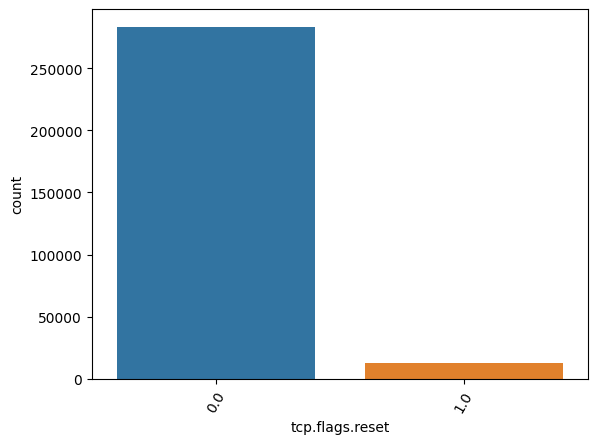

--------------------------------------------------------------------------------------------
                tcp.flags.push      Ratio
tcp.flags.push                           
0.0                     282498  95.306823
1.0                      13535   4.566326


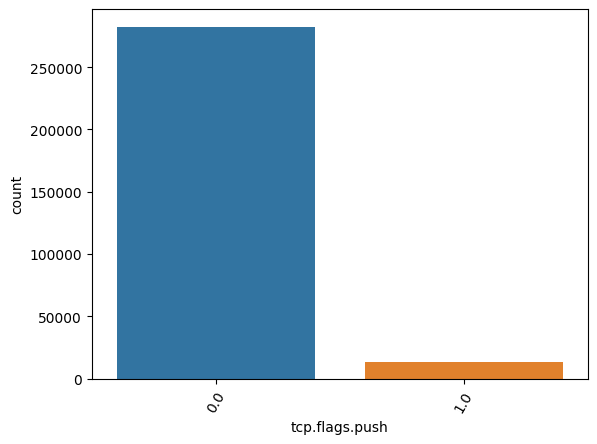

--------------------------------------------------------------------------------------------
               tcp.flags.ack      Ratio
tcp.flags.ack                          
0.0                   184237  62.156345
1.0                   111796  37.716803


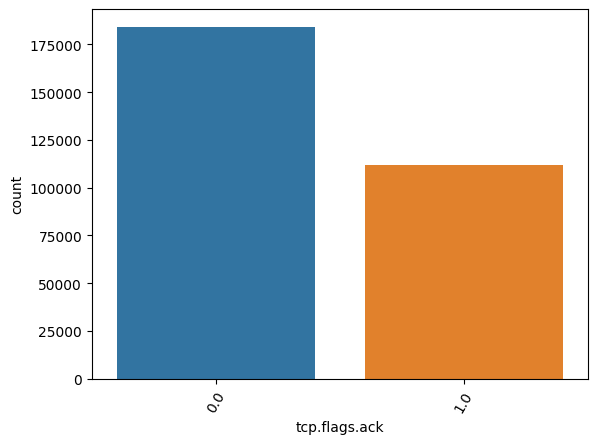

--------------------------------------------------------------------------------------------
               tcp.flags.urg      Ratio
tcp.flags.urg                          
0.0                   290033  97.848918
1.0                     6000   2.024230


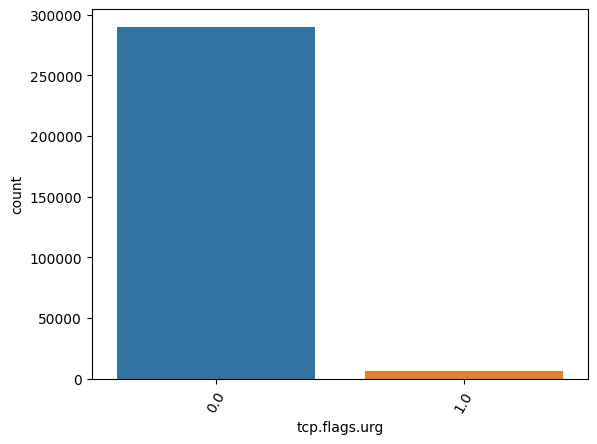

--------------------------------------------------------------------------------------------
               tcp.flags.cwr      Ratio
tcp.flags.cwr                          
0.0                   293939  99.166692
1.0                     2094   0.706456


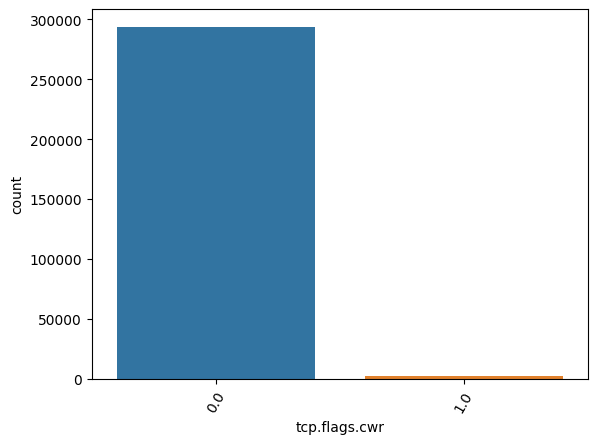

--------------------------------------------------------------------------------------------
                    tcp.urgent_pointer      Ratio
tcp.urgent_pointer                               
0.0                             296022  99.869437
1.0                                  6   0.002024
10.0                                 2   0.000675
46335.0                              1   0.000337
40571.0                              1   0.000337
256.0                                1   0.000337


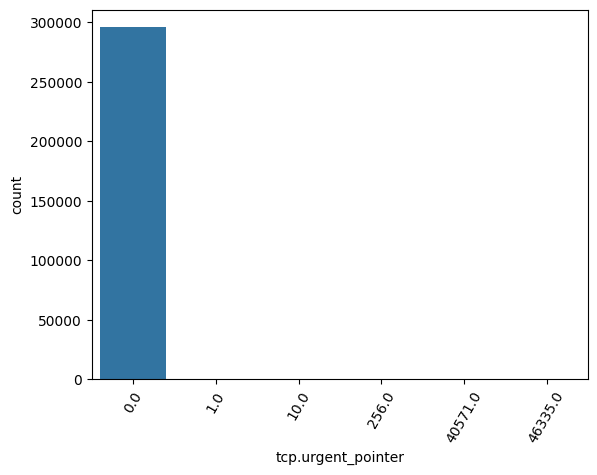

--------------------------------------------------------------------------------------------


In [18]:
for col in cat_cols:
    cat_summary(df,col,plot=True)

In [19]:
def num_summary(dataframe,numerical_col,plot=False):
    quantiles=[0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    2.964090e+05
mean     1.590382e+09
std      1.174005e+07
min      1.574312e+09
5%       1.574312e+09
10%      1.574312e+09
20%      1.574312e+09
30%      1.574312e+09
40%      1.598235e+09
50%      1.598722e+09
60%      1.598742e+09
70%      1.599017e+09
80%      1.599091e+09
90%      1.599599e+09
95%      1.599601e+09
99%      1.599602e+09
max      1.599602e+09
Name: frame_info.time_epoch, dtype: float64


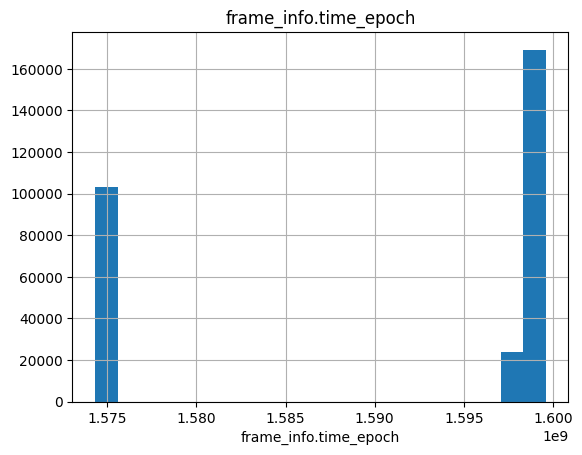

count    296409.000000
mean      35626.546809
std       59071.227973
min           1.000000
5%           91.000000
10%         183.000000
20%         368.000000
30%         558.000000
40%         765.000000
50%         972.000000
60%        1441.000000
70%       27406.200000
80%       86243.800000
90%      144789.600000
95%      172859.600000
99%      197964.840000
max      204155.000000
Name: frame_info.number, dtype: float64


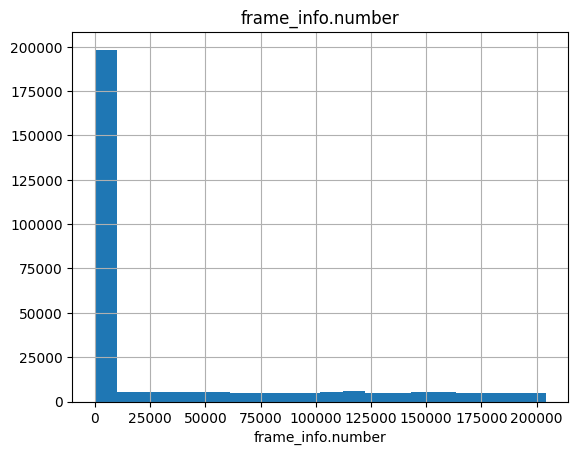

count    296409.000000
mean        324.894551
std         541.686373
min          54.000000
5%           54.000000
10%          54.000000
20%          54.000000
30%          66.000000
40%          74.000000
50%          74.000000
60%          74.000000
70%          74.000000
80%          94.000000
90%        1440.000000
95%        1514.000000
99%        1514.000000
max        5995.000000
Name: frame_info.len, dtype: float64


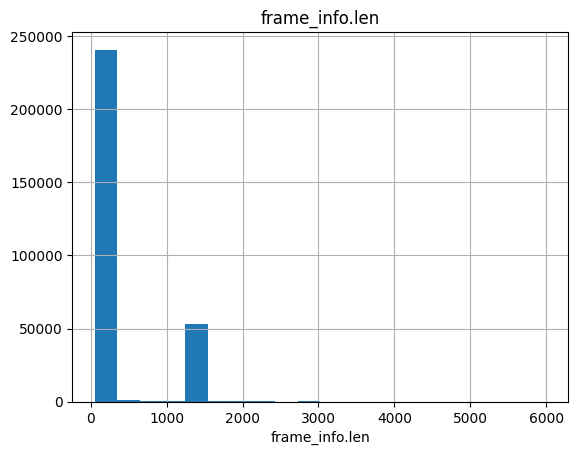

count    296409.000000
mean         66.410817
std           9.177927
min          54.000000
5%           54.000000
10%          54.000000
20%          54.000000
30%          58.000000
40%          66.000000
50%          66.000000
60%          74.000000
70%          74.000000
80%          74.000000
90%          74.000000
95%          74.000000
99%          86.000000
max          96.000000
Name: frame_info.cap_len, dtype: float64


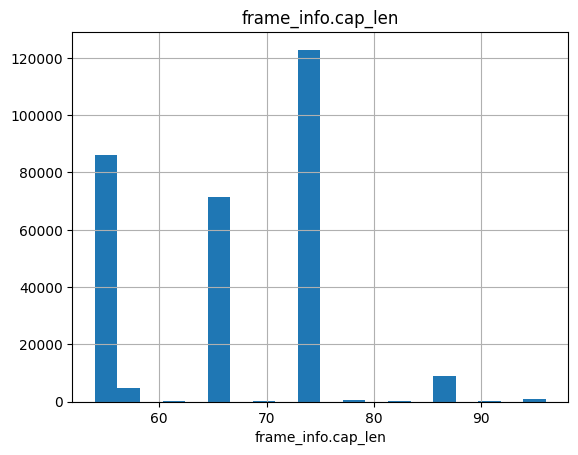

count    285077.000000
mean         70.433914
std          72.701513
min           1.000000
5%           28.000000
10%          32.000000
20%          34.000000
30%          35.000000
40%          35.000000
50%          35.000000
60%          38.000000
70%          55.000000
80%          61.000000
90%         242.000000
95%         246.000000
99%         247.000000
max         255.000000
Name: ip.ttl, dtype: float64


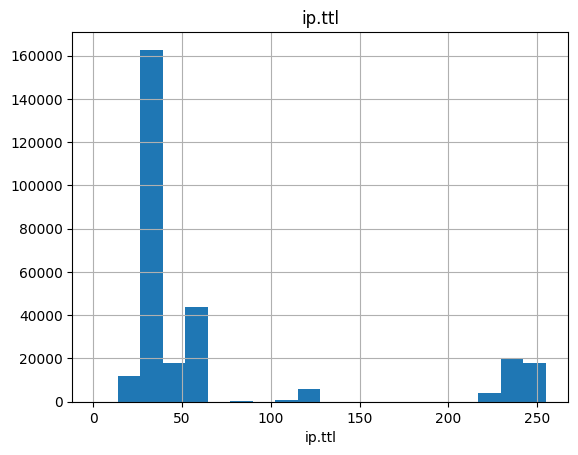

count    285077.000000
mean        284.058763
std         519.403940
min          40.000000
5%           40.000000
10%          40.000000
20%          40.000000
30%          52.000000
40%          60.000000
50%          60.000000
60%          60.000000
70%          60.000000
80%          60.000000
90%        1426.000000
95%        1496.000000
99%        1500.000000
max        5981.000000
Name: ip.len, dtype: float64


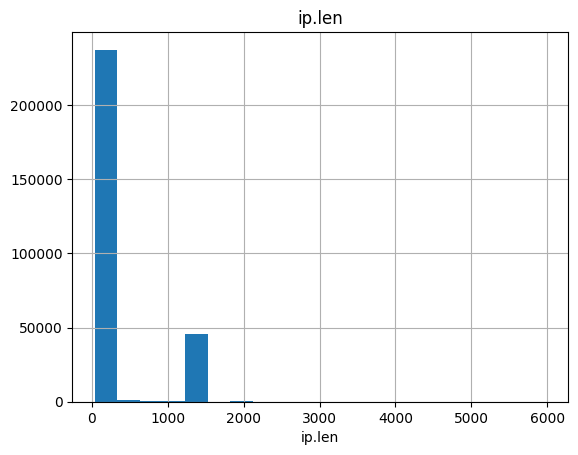

count    296033.000000
mean      32948.295079
std       22434.387096
min          21.000000
5%          443.000000
10%         443.000000
20%        1679.000000
30%       19074.000000
40%       34526.000000
50%       39557.000000
60%       44316.200000
70%       49744.000000
80%       53990.000000
90%       59256.000000
95%       60348.400000
99%       63885.000000
max       65534.000000
Name: tcp.srcport, dtype: float64


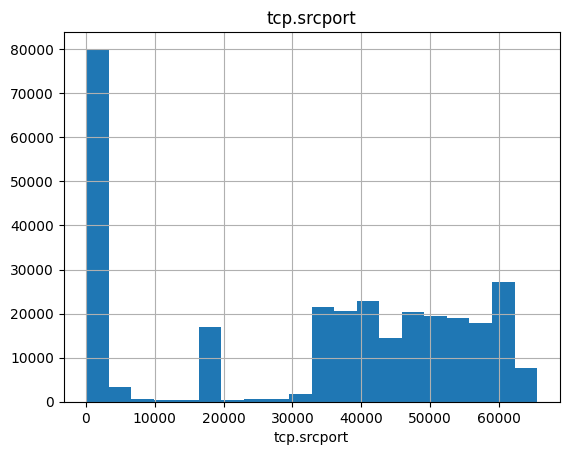

count    296033.000000
mean      14956.283367
std       21838.521789
min           0.000000
5%           22.000000
10%          22.000000
20%          80.000000
30%         294.000000
40%         612.000000
50%        1199.000000
60%        4443.000000
70%        9917.000000
80%       48790.000000
90%       51527.000000
95%       58202.000000
99%       64018.000000
max       65535.000000
Name: tcp.dstport, dtype: float64


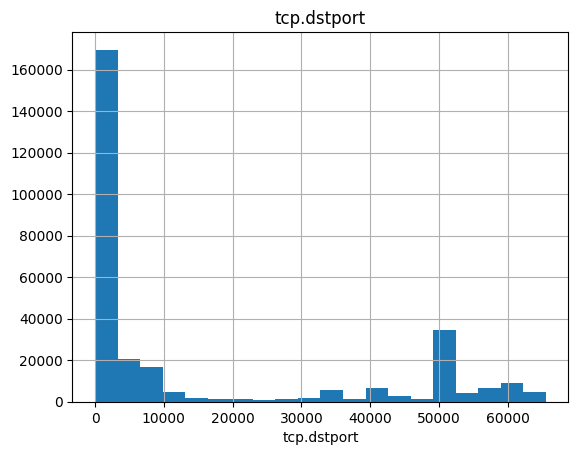

count    2.960330e+05
mean     1.649488e+07
std      7.343273e+07
min      0.000000e+00
5%       0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
40%      0.000000e+00
50%      0.000000e+00
60%      1.000000e+00
70%      1.000000e+00
80%      3.200000e+01
90%      1.911341e+07
95%      9.090007e+07
99%      4.195298e+08
max      4.294967e+09
Name: tcp.seq, dtype: float64


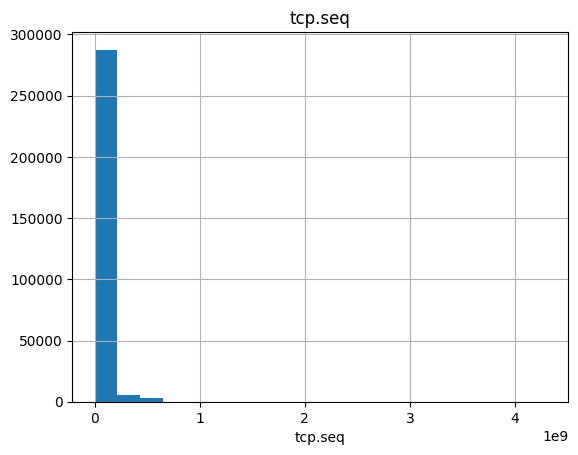

count    2.960330e+05
mean     3.049050e+07
std      2.071842e+08
min      0.000000e+00
5%       0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
40%      0.000000e+00
50%      0.000000e+00
60%      1.000000e+00
70%      1.000000e+00
80%      1.000000e+00
90%      2.295300e+04
95%      1.099957e+06
99%      1.361167e+09
max      4.294967e+09
Name: tcp.ack, dtype: float64


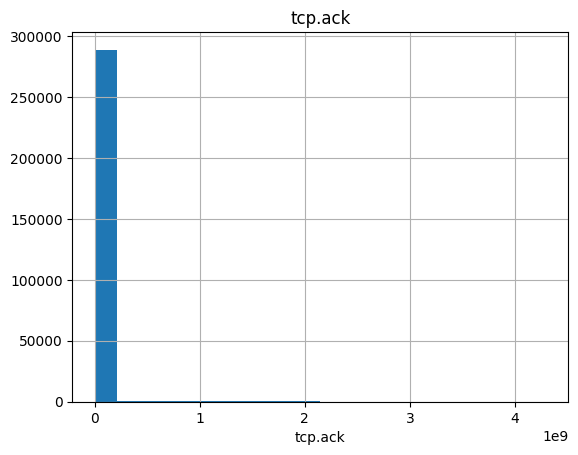

count    296033.000000
mean        258.798840
std         541.838625
min           0.000000
5%            0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           0.000000
70%           0.000000
80%           7.000000
90%        1374.000000
95%        1444.000000
99%        1460.000000
max        5941.000000
Name: tcp.len, dtype: float64


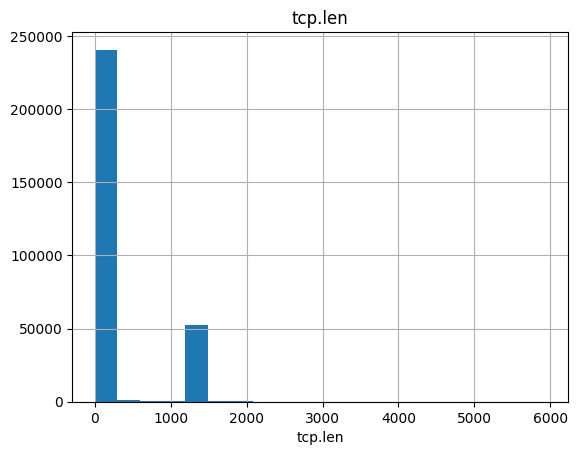

count    296033.000000
mean         31.648458
std           8.475774
min          20.000000
5%           20.000000
10%          20.000000
20%          20.000000
30%          24.000000
40%          32.000000
50%          32.000000
60%          40.000000
70%          40.000000
80%          40.000000
90%          40.000000
95%          40.000000
99%          40.000000
max          60.000000
Name: tcp.hdr_len, dtype: float64


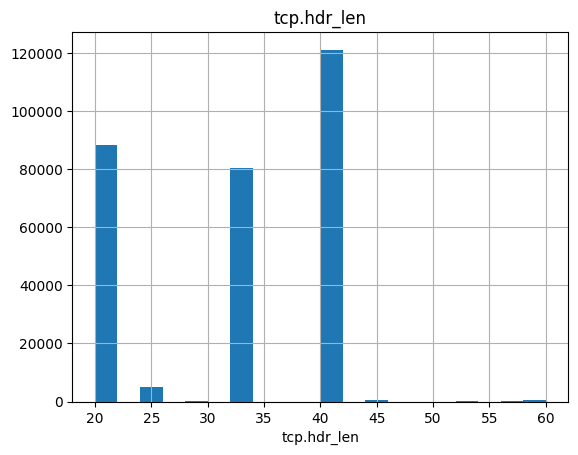

count    2.960330e+05
mean     3.424046e+04
std      5.725422e+04
min      0.000000e+00
5%       6.000000e+01
10%      1.180000e+02
20%      2.910000e+02
30%      1.024000e+03
40%      1.024000e+03
50%      6.407400e+04
60%      6.424000e+04
70%      6.424000e+04
80%      6.424000e+04
90%      6.448000e+04
95%      6.451200e+04
99%      6.553500e+04
max      1.644544e+07
Name: tcp.window_size, dtype: float64


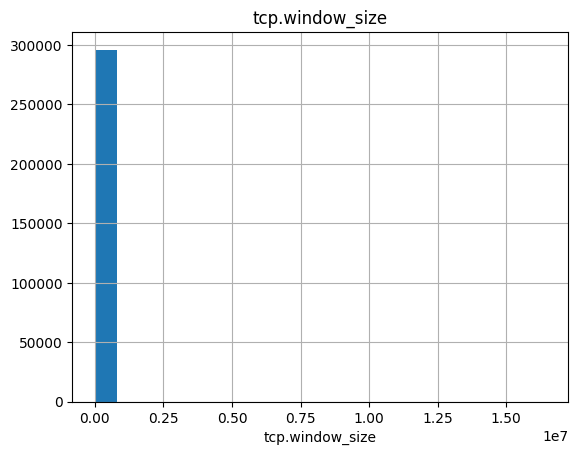

count    127498.000000
mean       1419.192301
std         124.607721
min         536.000000
5%         1240.000000
10%        1240.000000
20%        1410.000000
30%        1440.000000
40%        1440.000000
50%        1440.000000
60%        1440.000000
70%        1440.000000
80%        1440.000000
90%        1460.000000
95%        1460.000000
99%        1460.000000
max        8961.000000
Name: tcp.options.mss_val, dtype: float64


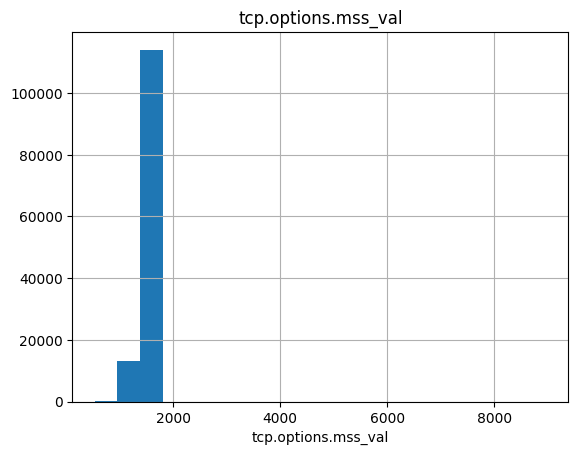

In [20]:
for col in num_cols:
    num_summary(df,col,plot=True)

In [21]:
#Hedef değişken ve kategorik değişken analizi

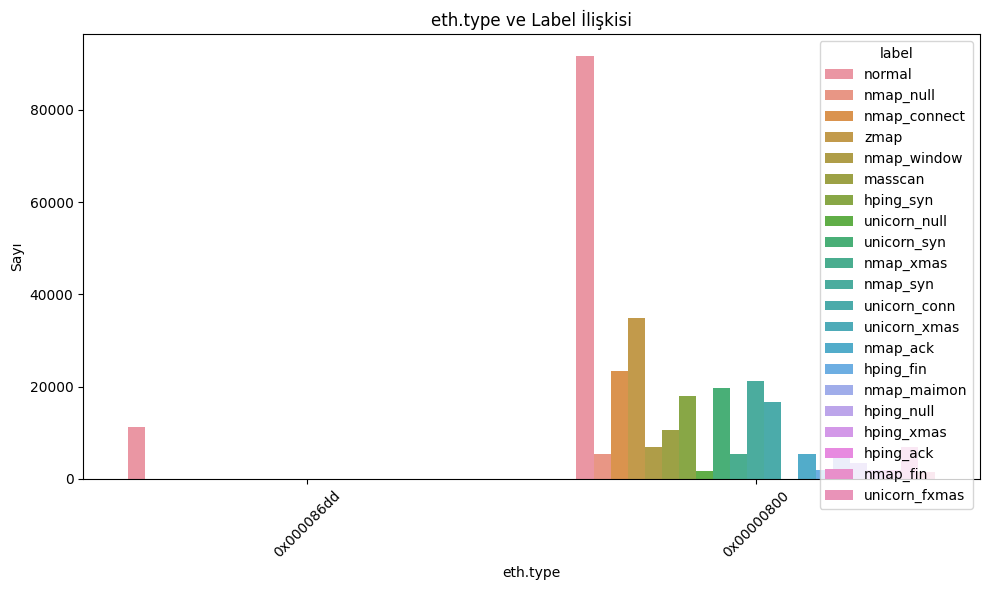

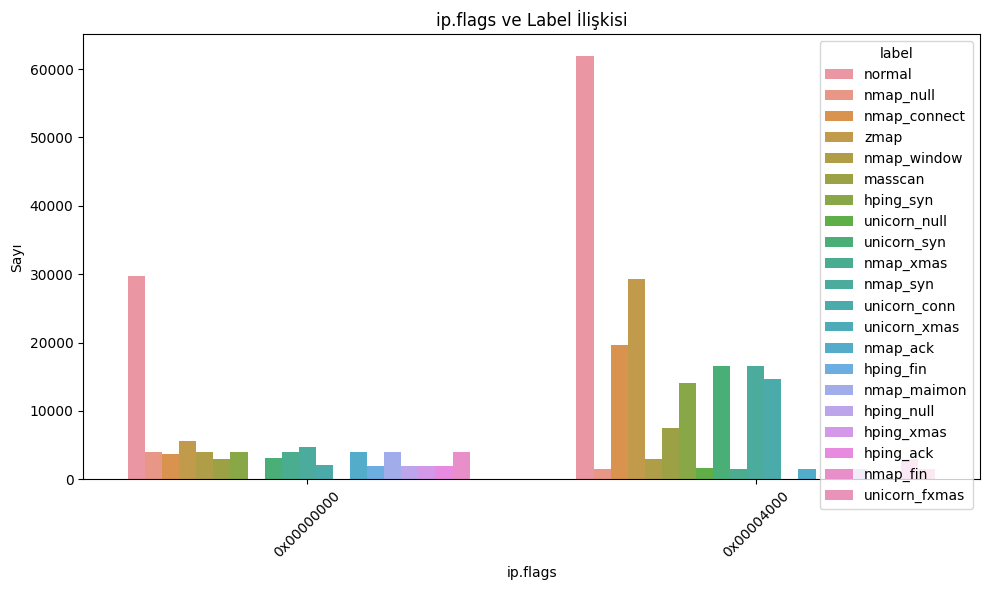

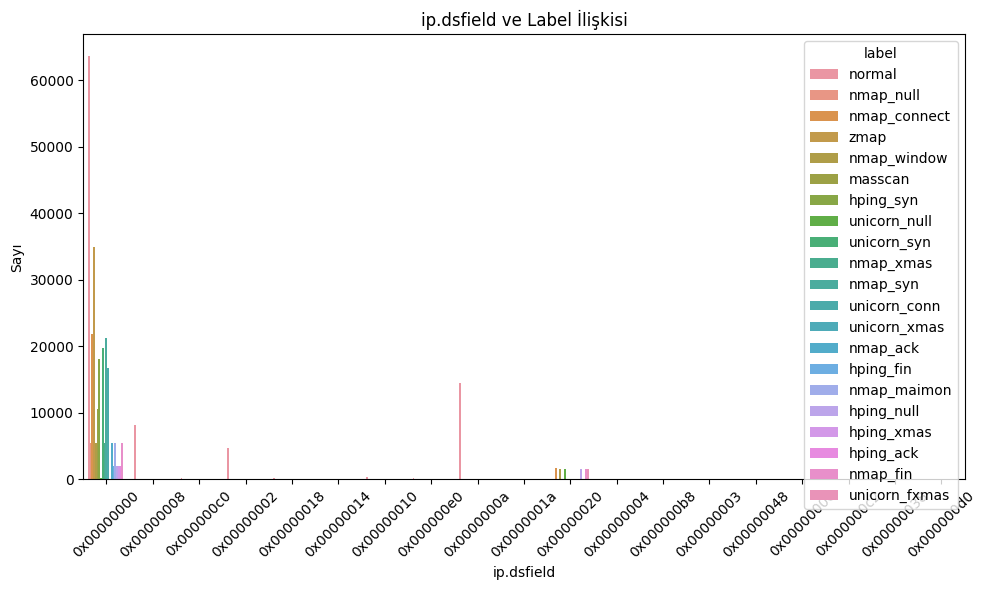

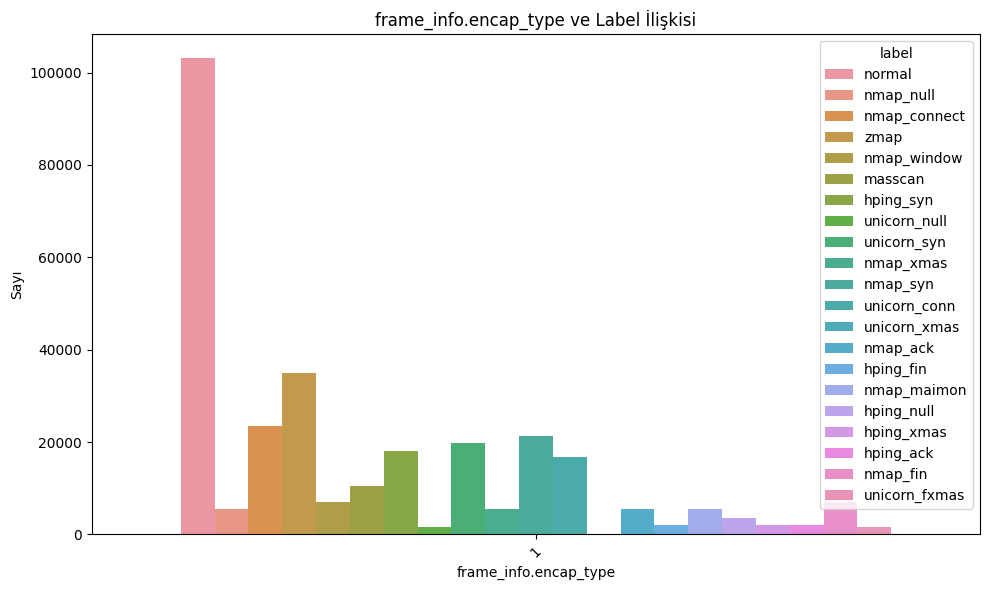

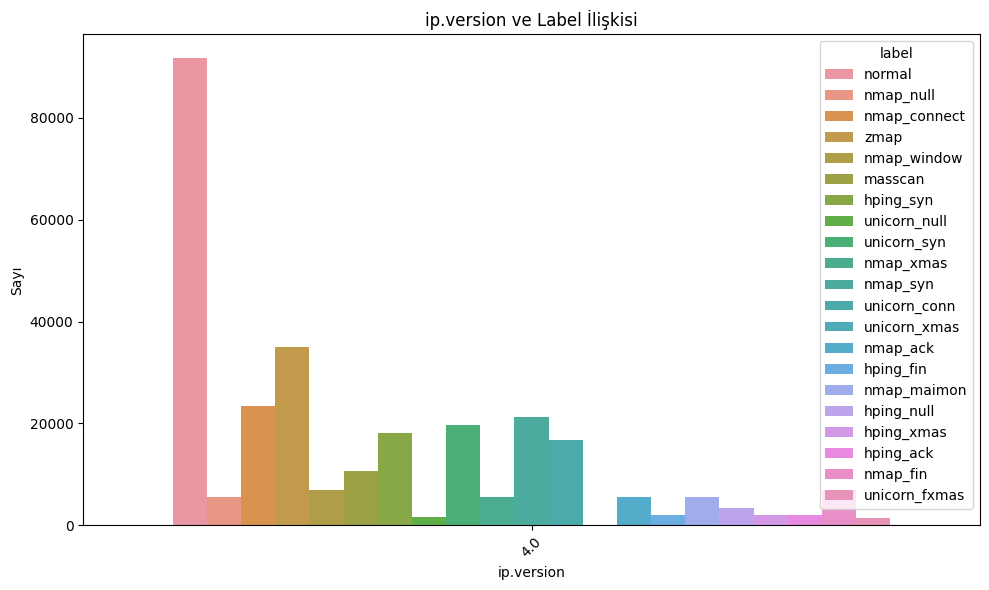

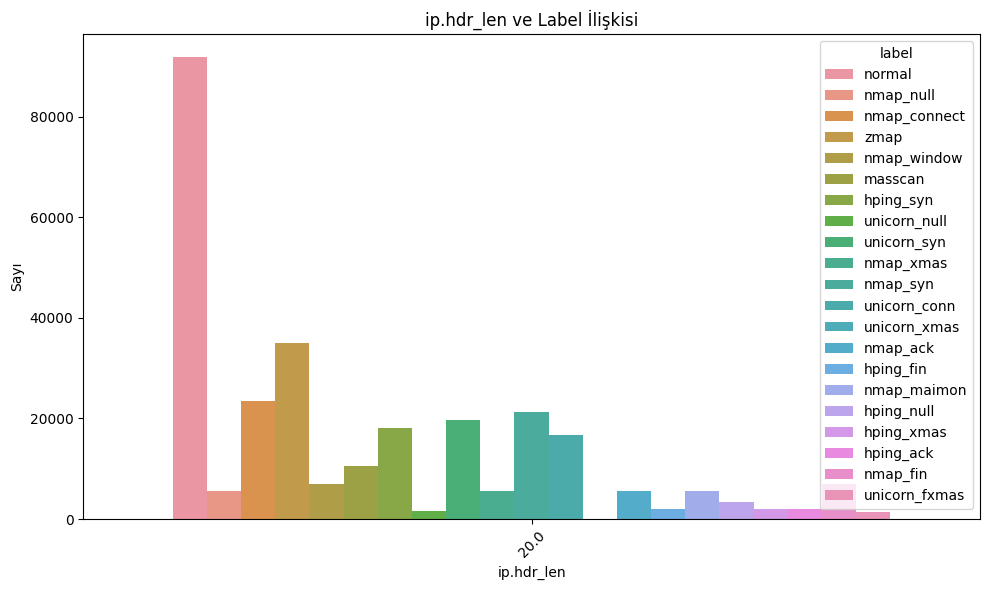

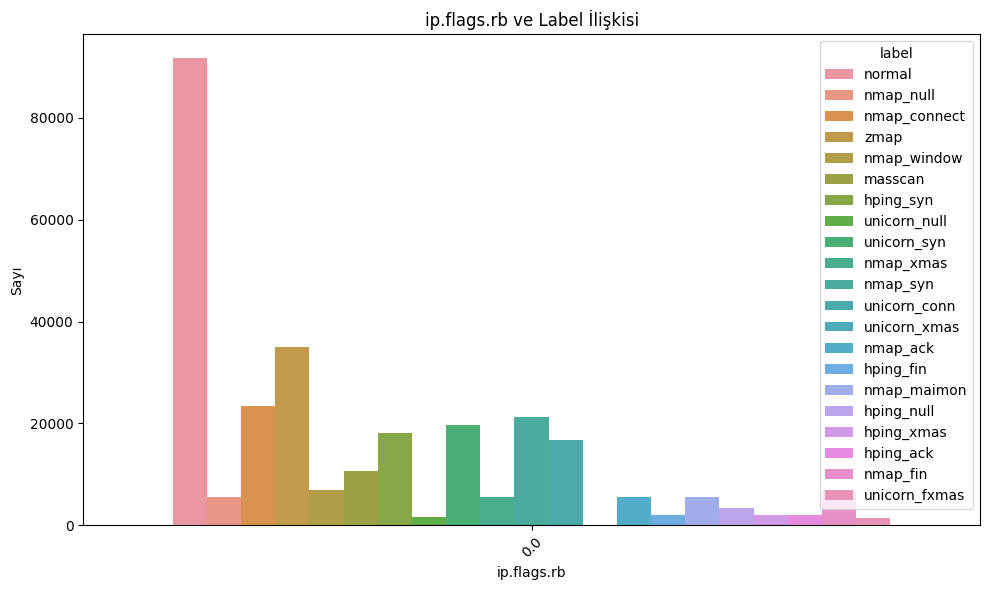

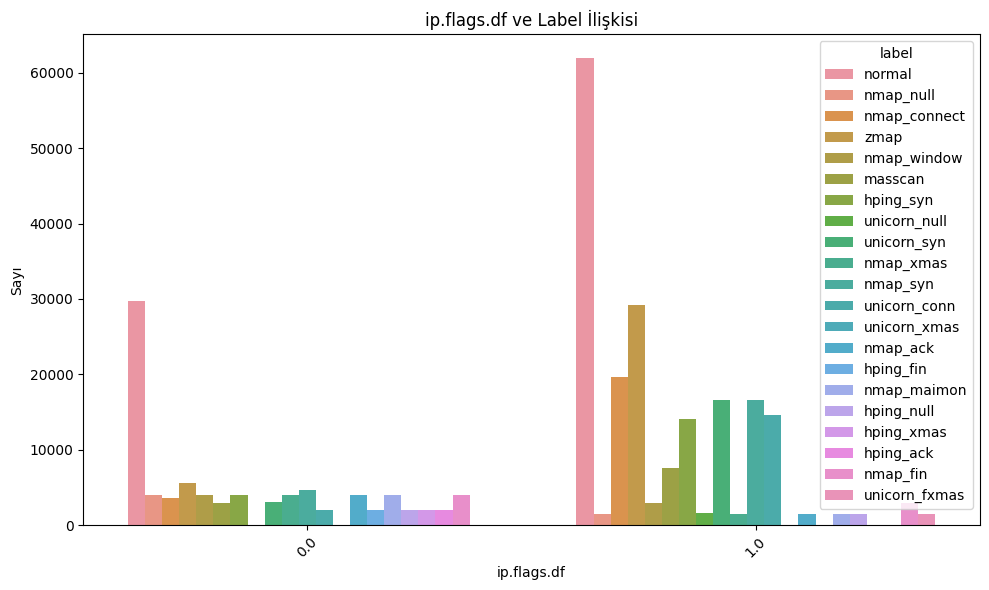

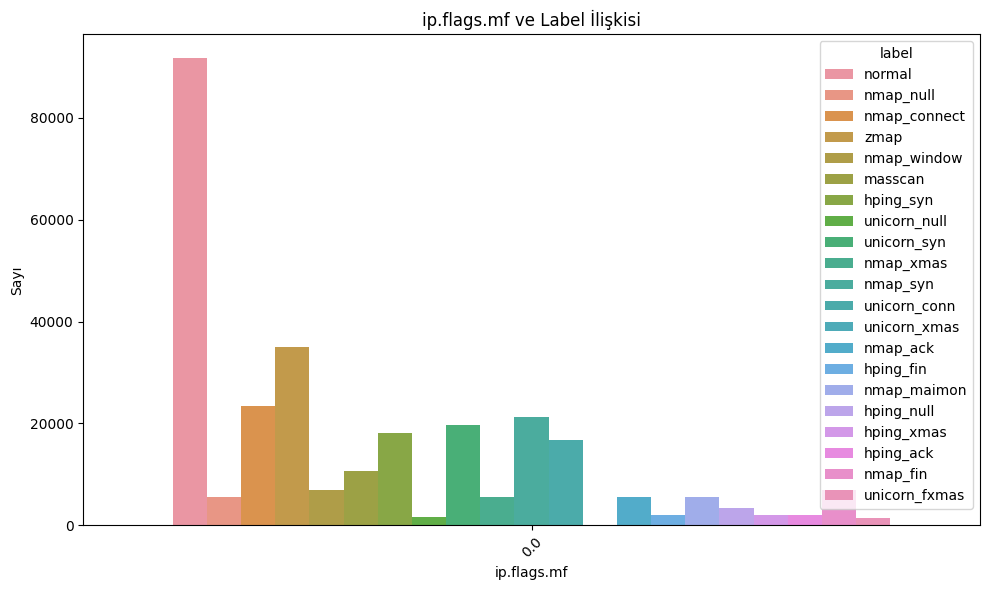

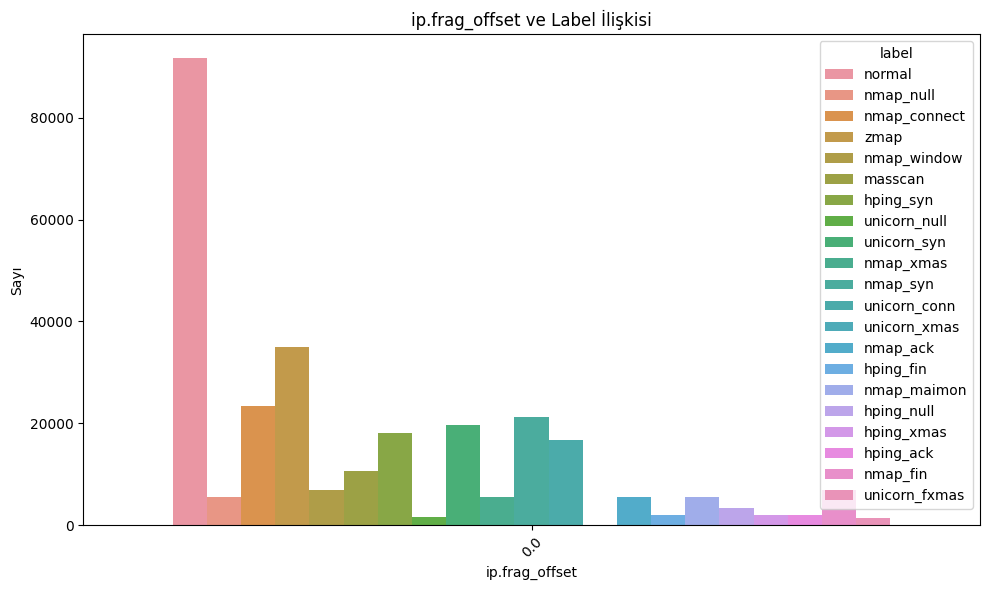

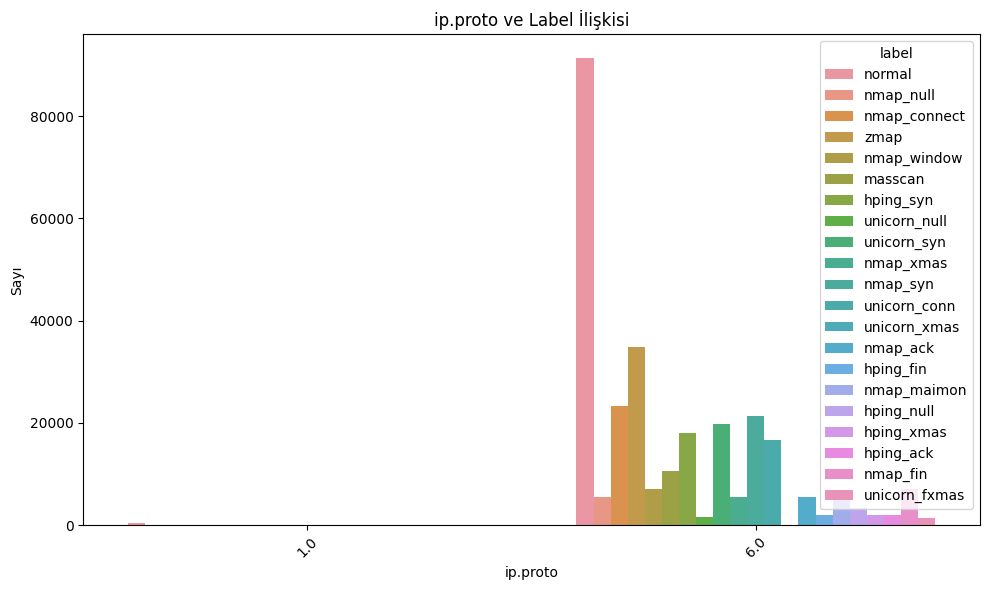

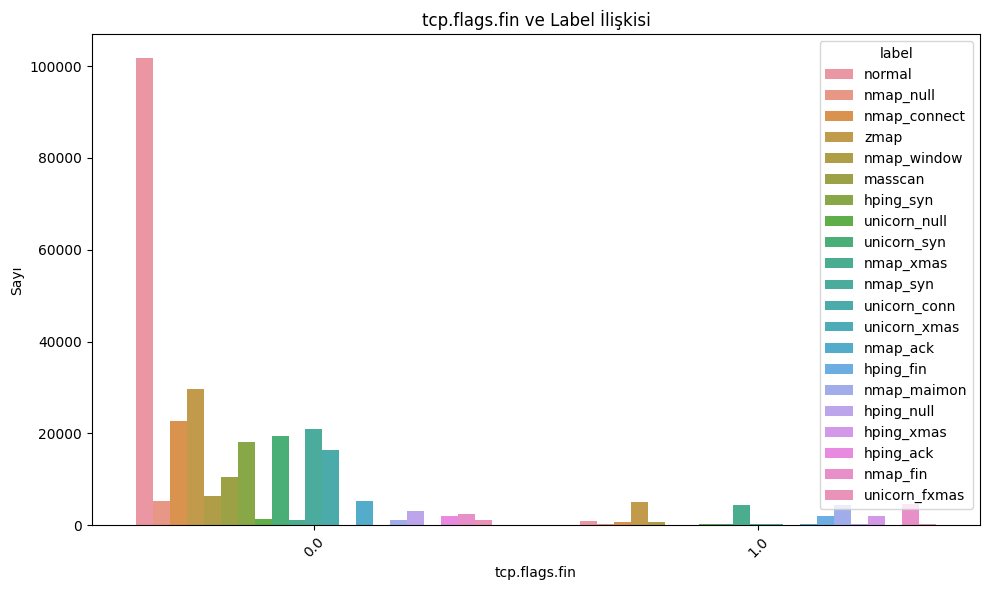

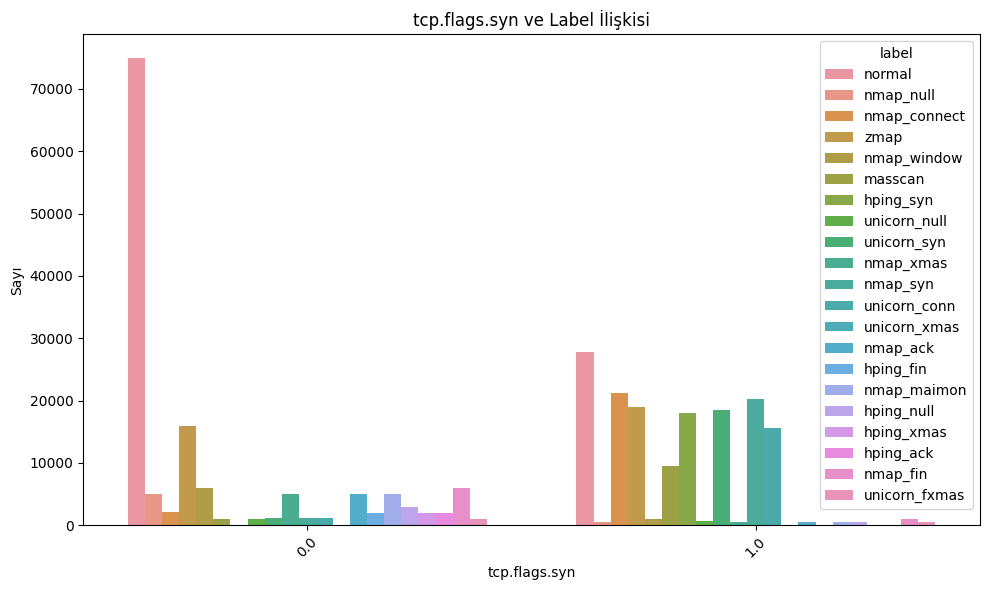

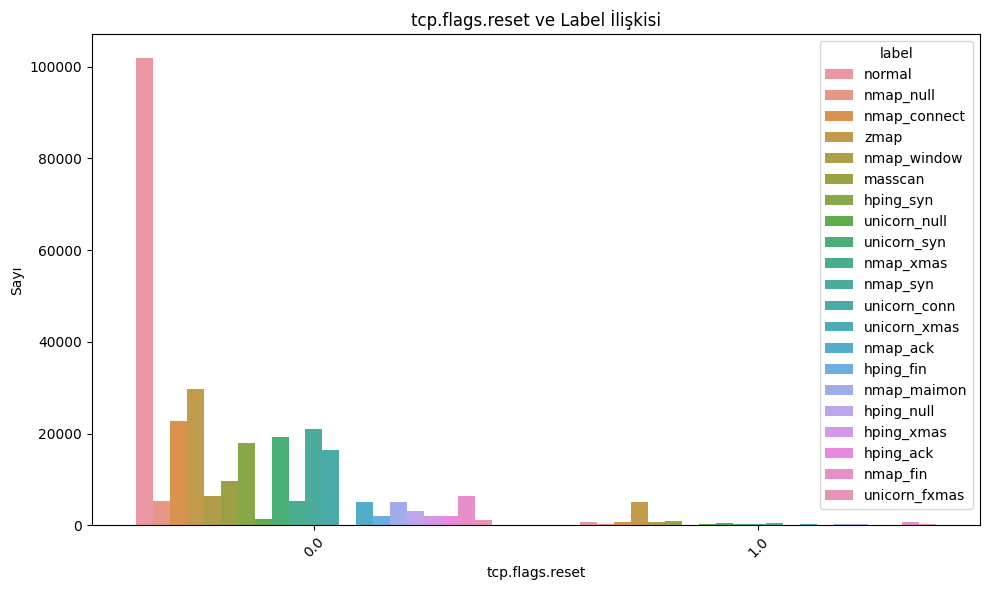

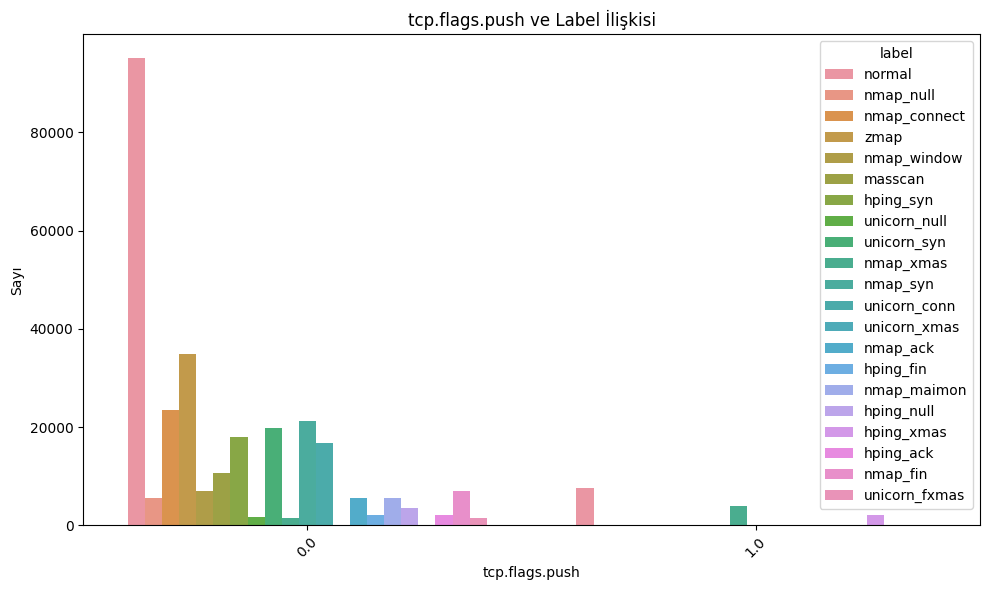

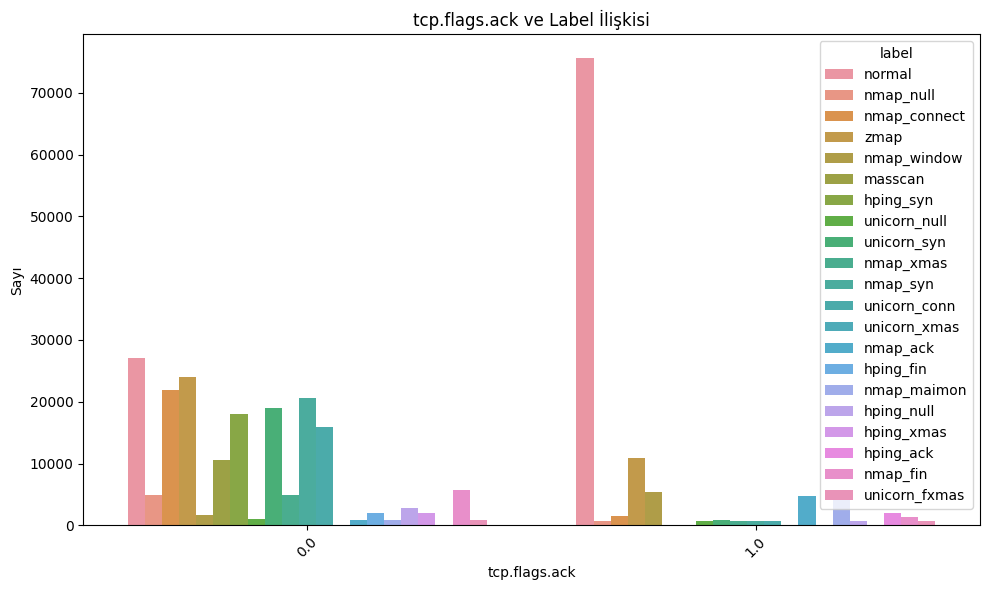

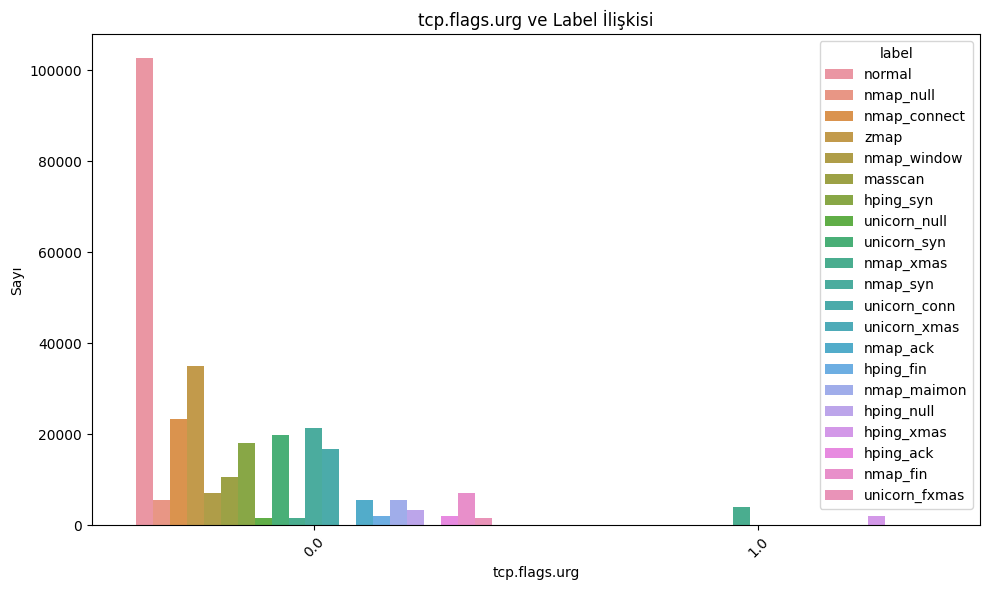

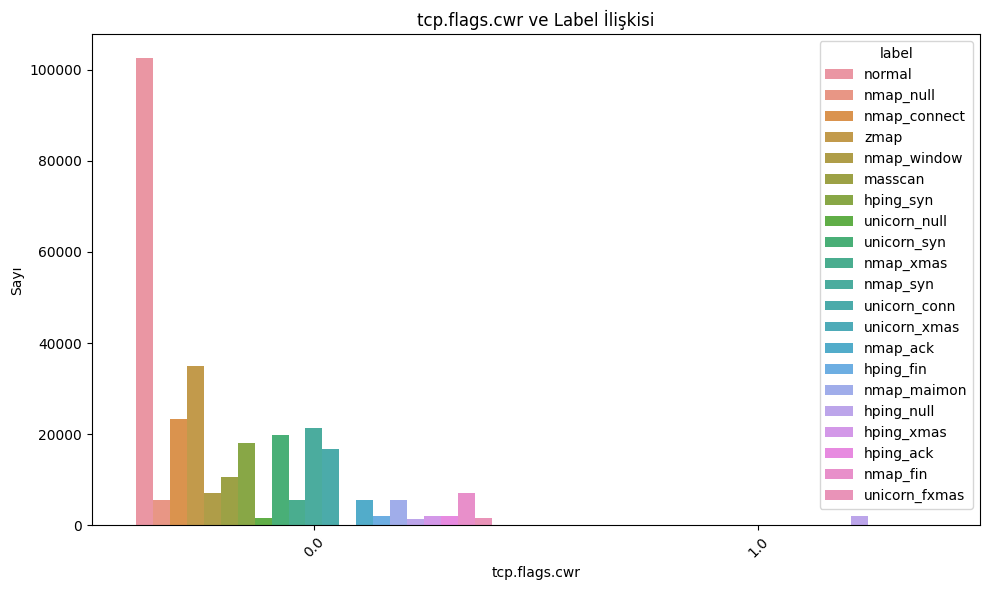

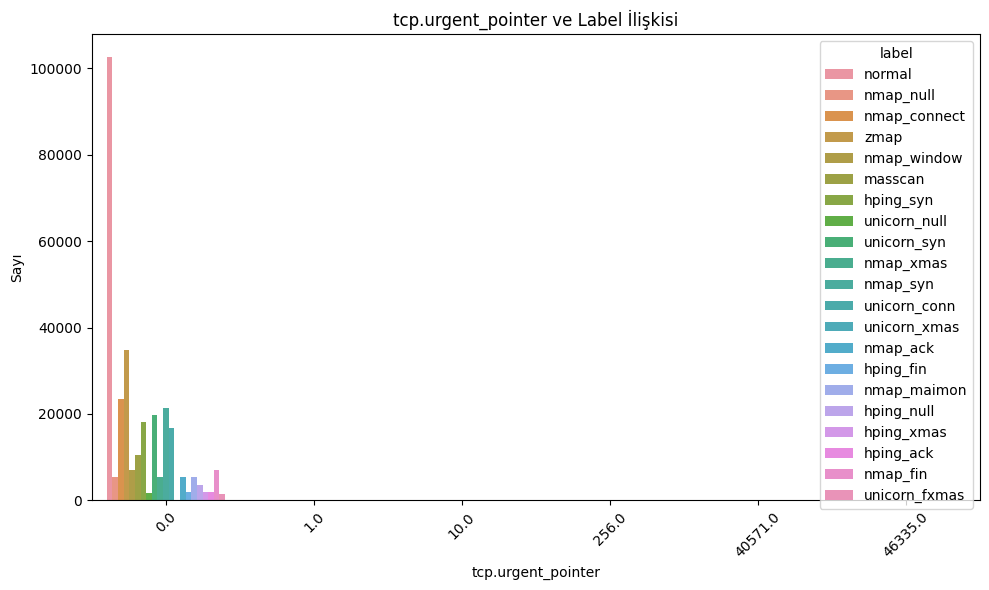

In [22]:
for feature in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='label', data=df)
    plt.title(f'{feature} ve Label İlişkisi')
    plt.xlabel(feature)
    plt.ylabel('Sayı')
    plt.legend(title='label', loc='upper right')
    plt.xticks(rotation=45)  # Eğer x eksenindeki etiketler fazla ise, döndürme işlemi yapabilirsiniz
    plt.tight_layout()
    plt.show()

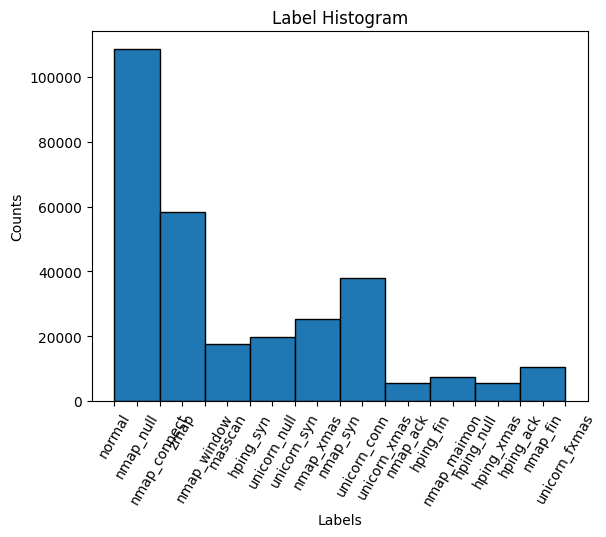

In [23]:
plt.hist(df['label'],edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Histogram')
plt.show()

In [24]:
df['label'] = df['label'].apply(lambda x: 'scan' if x != 'normal' else x)

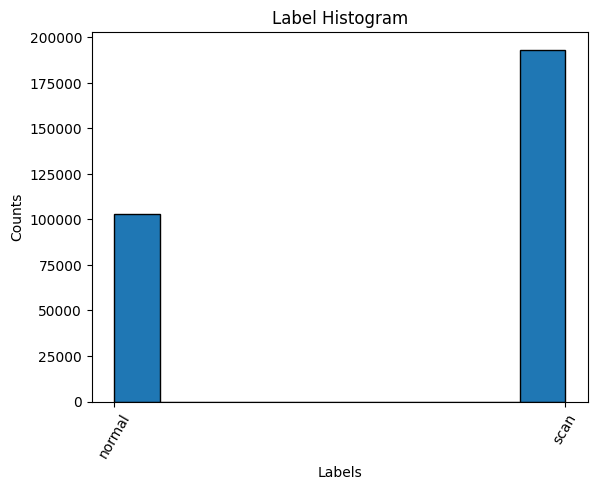

In [25]:
plt.hist(df['label'],edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Histogram')
plt.show()

In [26]:
for col_name in df.columns:
    print(f"Column Name: {col_name}, Unique Value Counts: {len(df[col_name].unique())}")
    if (len(df[col_name].unique()) < 22):
        print(df[col_name].unique())

Column Name: frame_info.encap_type, Unique Value Counts: 1
[1]
Column Name: frame_info.time, Unique Value Counts: 275339
Column Name: frame_info.time_epoch, Unique Value Counts: 275339
Column Name: frame_info.number, Unique Value Counts: 104216
Column Name: frame_info.len, Unique Value Counts: 1439
Column Name: frame_info.cap_len, Unique Value Counts: 12
[74 54 70 66 94 86 58 78 82 62 96 90]
Column Name: eth.type, Unique Value Counts: 2
['0x000086dd' '0x00000800']
Column Name: ip.version, Unique Value Counts: 2
[nan  4.]
Column Name: ip.hdr_len, Unique Value Counts: 2
[nan 20.]
Column Name: ip.id, Unique Value Counts: 64163
Column Name: ip.flags, Unique Value Counts: 3
[nan '0x00000000' '0x00004000']
Column Name: ip.flags.rb, Unique Value Counts: 2
[nan  0.]
Column Name: ip.flags.df, Unique Value Counts: 3
[nan  0.  1.]
Column Name: ip.flags.mf, Unique Value Counts: 2
[nan  0.]
Column Name: ip.frag_offset, Unique Value Counts: 2
[nan  0.]
Column Name: ip.ttl, Unique Value Counts: 120
C

In [27]:
drop_names = ["eth.type","ip.version","ip.hdr_len","ip.id","ip.flags.rb",
                "ip.flags.mf","ip.frag_offset","frame_info.number",
              "frame_info.number","frame_info.encap_type","tcp.len",
             "tcp.urgent_pointer","tcp.options.mss_val",
              "ip.dst","ip.src","frame_info.time_epoch","frame_info.time"]

In [28]:
df = df.drop(columns=drop_names)

In [29]:
for col_name in df.columns:
    print(f"Column Name: {col_name}, Unique Value Counts: {len(df[col_name].unique())}")
    if (len(df[col_name].unique()) < 60):
        print(df[col_name].unique())

Column Name: frame_info.len, Unique Value Counts: 1439
Column Name: frame_info.cap_len, Unique Value Counts: 12
[74 54 70 66 94 86 58 78 82 62 96 90]
Column Name: ip.flags, Unique Value Counts: 3
[nan '0x00000000' '0x00004000']
Column Name: ip.flags.df, Unique Value Counts: 3
[nan  0.  1.]
Column Name: ip.ttl, Unique Value Counts: 120
Column Name: ip.proto, Unique Value Counts: 3
[nan  6.  1.]
Column Name: ip.checksum, Unique Value Counts: 64216
Column Name: ip.len, Unique Value Counts: 1330
Column Name: ip.dsfield, Unique Value Counts: 20
[nan '0x00000000' '0x00000008' '0x000000c0' '0x00000002' '0x00000018'
 '0x00000014' '0x00000010' '0x000000e0' '0x0000000a' '0x0000001a'
 '0x00000020' '0x00000004' '0x000000b8' '0x00000003' '0x00000048'
 '0x0000000c' '0x000000c2' '0x00000038' '0x000000d0']
Column Name: tcp.srcport, Unique Value Counts: 30177
Column Name: tcp.dstport, Unique Value Counts: 12830
Column Name: tcp.seq, Unique Value Counts: 54548
Column Name: tcp.ack, Unique Value Counts: 

In [30]:
df.columns

Index(['frame_info.len', 'frame_info.cap_len', 'ip.flags', 'ip.flags.df',
       'ip.ttl', 'ip.proto', 'ip.checksum', 'ip.len', 'ip.dsfield',
       'tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.hdr_len',
       'tcp.flags', 'tcp.flags.fin', 'tcp.flags.syn', 'tcp.flags.reset',
       'tcp.flags.push', 'tcp.flags.ack', 'tcp.flags.urg', 'tcp.flags.cwr',
       'tcp.window_size', 'tcp.checksum', 'label'],
      dtype='object')

In [31]:
df = df.dropna(subset=['tcp.srcport','ip.ttl'])

In [32]:
df.isna().sum()

frame_info.len        0
frame_info.cap_len    0
ip.flags              0
ip.flags.df           0
ip.ttl                0
ip.proto              0
ip.checksum           0
ip.len                0
ip.dsfield            0
tcp.srcport           0
tcp.dstport           0
tcp.seq               0
tcp.ack               0
tcp.hdr_len           0
tcp.flags             0
tcp.flags.fin         0
tcp.flags.syn         0
tcp.flags.reset       0
tcp.flags.push        0
tcp.flags.ack         0
tcp.flags.urg         0
tcp.flags.cwr         0
tcp.window_size       0
tcp.checksum          0
label                 0
dtype: int64

In [33]:
hex_columns = ["tcp.checksum","tcp.flags","ip.dsfield","ip.checksum","ip.flags"]
for col in hex_columns:
    df[col] = df[col].apply(lambda x: float(int(x, 16)))

In [34]:
df.head()

,frame_info.len,frame_info.cap_len,ip.flags,ip.flags.df,ip.ttl,ip.proto,ip.checksum,ip.len,ip.dsfield,tcp.srcport,...,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,label
1,54,54,0.0,0.0,247.0,6.0,12832.0,40.0,0.0,53026.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,61355.0,normal
3,551,66,16384.0,1.0,56.0,6.0,13960.0,537.0,8.0,443.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,252.0,60933.0,normal
4,94,94,16384.0,1.0,59.0,6.0,12472.0,80.0,0.0,59206.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4677.0,18651.0,normal
5,68,66,16384.0,1.0,55.0,6.0,64767.0,54.0,0.0,52239.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,115.0,7590.0,normal
6,54,54,0.0,0.0,244.0,6.0,40274.0,40.0,8.0,44034.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65535.0,18914.0,normal


In [35]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [36]:
X = df.drop("label", axis=1)
y = df["label"]

In [37]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [38]:
def class_weight(labels_dict,mu=0.15):
    total = sum(labels_dict.values())
    keys = labels_dict.keys()
    weights = dict()
    for i in keys:
        score = np.log((mu*total)/float(labels_dict[i]))
        weights[i] = score if score > 1 else 1
    return weights

labels_dict = y.value_counts().to_dict()
weights = class_weight(labels_dict)

print('labels dictionary: ', labels_dict)
print('weights: ',weights)

labels dictionary:  {1: 193315, 0: 91386}
weights:  {1: 1, 0: 1}


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [40]:
print(f"X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape: {y_test.shape}")

X_train Shape: (241995, 24)
X_test Shape: (42706, 24)
y_train Shape: (241995,)
y_test Shape: (42706,)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284701 entries, 1 to 296408
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   frame_info.len      284701 non-null  int64  
 1   frame_info.cap_len  284701 non-null  int64  
 2   ip.flags            284701 non-null  float64
 3   ip.flags.df         284701 non-null  float64
 4   ip.ttl              284701 non-null  float64
 5   ip.proto            284701 non-null  float64
 6   ip.checksum         284701 non-null  float64
 7   ip.len              284701 non-null  float64
 8   ip.dsfield          284701 non-null  float64
 9   tcp.srcport         284701 non-null  float64
 10  tcp.dstport         284701 non-null  float64
 11  tcp.seq             284701 non-null  float64
 12  tcp.ack             284701 non-null  float64
 13  tcp.hdr_len         284701 non-null  float64
 14  tcp.flags           284701 non-null  float64
 15  tcp.flags.fin       284701 non-null  fl

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
tree_classifier = DecisionTreeClassifier(class_weight=weights,max_depth=5, min_samples_leaf=10)
tree_classifier.fit(X_train, y_train)
tree_predictions = tree_classifier.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_precision = precision_score(y_test, tree_predictions,average="weighted")
tree_recall = recall_score(y_test, tree_predictions,average="weighted")
tree_f1 = f1_score(y_test, tree_predictions,average="weighted")
print("Karar Ağacı Doğruluk:", tree_accuracy)
print("Karar Ağacı Precision:", tree_precision)
print("Karar Ağacı Recall:", tree_recall)
print("Karar Ağacı F1-Score:", tree_f1)

Karar Ağacı Doğruluk: 0.997400833606519
Karar Ağacı Precision: 0.9974006782570426
Karar Ağacı Recall: 0.997400833606519
Karar Ağacı F1-Score: 0.997399894110839


In [43]:
y_train_pred = tree_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Eğitim doğruluk: {train_accuracy}")
print(f"Test doğruluk: {test_accuracy}")

Eğitim doğruluk: 0.9968553069278291
Test doğruluk: 0.997400833606519


In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(tree_classifier, X,y, cv=5)

print("Ortalama Doğruluk:", cv_scores.mean())

Ortalama Doğruluk: 0.9589497756374092


In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = SVC(random_state=42,verbose=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

[LibSVM].......................................................
*....
*
optimization finished, #iter = 59046
obj = -92008.265400, rho = 0.908894
nSV = 95479, nBSV = 95257
Total nSV = 95479
Accuracy: 0.8153655224090292
Precision: 0.8504109403110603
Recall: 0.8153655224090292
F1 Score: 0.7899211740682179
